In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,5)

In [20]:
df = pd.read_csv(r"C:\Users\User\Desktop\ИИИ ДПО\Myalina_Olya_AI\S02-hw-dataset.csv")
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [22]:
df.describe(include='all')

,user_id,age,country,purchases,revenue
count,41.000000,39.000000,41,41.000000,41.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,RU,NaN,NaN
freq,NaN,NaN,13,NaN,NaN
mean,20.243902,36.512821,NaN,4.829268,820.048780
std,11.659289,18.304259,NaN,2.710189,613.127269
min,1.000000,5.000000,NaN,-1.000000,0.000000
25%,10.000000,24.000000,NaN,3.000000,432.000000
50%,20.000000,33.000000,NaN,5.000000,693.000000
75%,30.000000,45.500000,NaN,7.000000,1115.000000


In [23]:
df.isna().mean().sort_values(ascending=False) * 100

age          4.878049
user_id      0.000000
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64

In [24]:
df.duplicated().sum()

1

In [25]:
df[df.duplicated()]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [26]:
df[(df["age"] < 0) | (df["purchases"] < 0) | (df["revenue"] < 0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [27]:
df[df["age"] > 100]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [28]:
df[(df["purchases"] == 0) & (df["revenue"] > 0)]

,user_id,age,country,purchases,revenue


По результатам проверки качества данных выявлены следующие проблемы:

1. Пропуски: колонка 'age' содержит ~4.88% пропущенных значений, что может повлиять на анализ возрастных групп.
2. Дубликаты: обнаружена 1 полностью дублирующаяся строка, которую рекомендуется удалить.
3. Подозрительные значения: есть строки с нереалистичным возрастом (age = 120) и отрицательным числом покупок (purchases = -1), что требует очистки данных перед дальнейшим анализом.

In [29]:
df["country"].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [30]:
df["country"].value_counts(normalize=True)

country
RU    0.317073
FR    0.292683
US    0.195122
DE    0.146341
CN    0.048780
Name: proportion, dtype: float64

In [31]:
df.groupby("country")[["purchases", "revenue"]].agg(["mean", "sum", "median"])

purchases                 revenue               
             mean sum median         mean    sum  median
country                                                 
CN       4.500000   9    4.5  1054.000000   2108  1054.0
DE       6.500000  39    6.0  1445.500000   8673  1200.0
FR       4.250000  51    6.0   675.916667   8111   619.5
RU       4.769231  62    6.0   790.076923  10271   650.0
US       4.625000  37    4.0   557.375000   4459   537.5

In [32]:
df["age_group"] = pd.cut(df["age"], bins=[0, 18, 30, 45, 60, 100])
df.groupby("age_group", observed=False)[["purchases", "revenue"]].mean()

,purchases,revenue
age_group,,
"(0, 18]",6.000000,1296.000000
"(18, 30]",4.461538,565.538462
"(30, 45]",5.357143,1108.214286
"(45, 60]",4.333333,605.777778
"(60, 100]",NaN,NaN


Наибольшее число пользователей приходится на страны RU и FR, которые вместе составляют около 61% всей выборки, а наименее представлены CN и DE. По среднему количеству покупок пользователи всех стран примерно равны (4–6 покупок), однако суммарный доход выше у стран с большим числом пользователей — RU и FR.  

По возрастным группам самые активные по среднему количеству покупок — молодые пользователи до 18 лет и группа 30–45 лет. Неожиданным является отсутствие данных по возрастной группе 60–100 лет, а также высокий средний доход в CN при очень малом числе пользователей, что может быть нерепрезентативно.

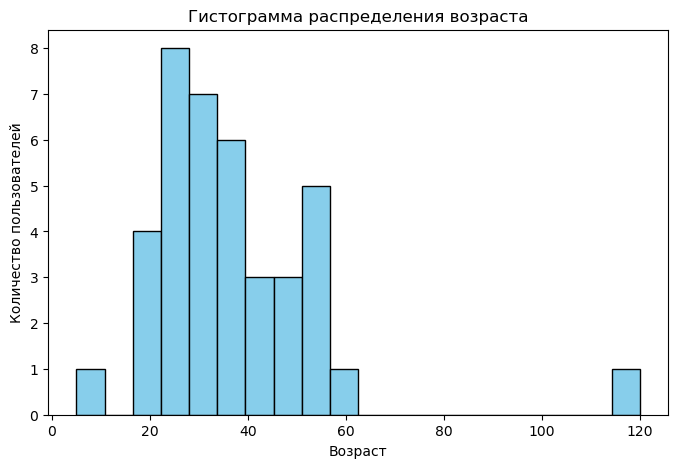

In [33]:
plt.hist(df["age"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Возраст")
plt.ylabel("Количество пользователей")
plt.title("Гистограмма распределения возраста")
plt.show()

# Комментарий:
# Гистограмма показывает распределение пользователей по возрасту.

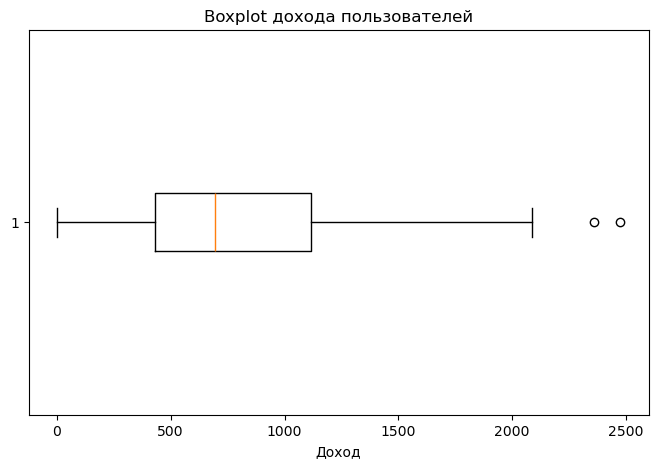

In [34]:
plt.boxplot(df["revenue"], vert=False)
plt.xlabel("Доход")
plt.title("Boxplot дохода пользователей")
plt.show()

# Комментарий:
# Boxplot отображает медиану, нижние и верхние квартели дохода и возможные выбросы (очень высокие или низкие значения дохода).

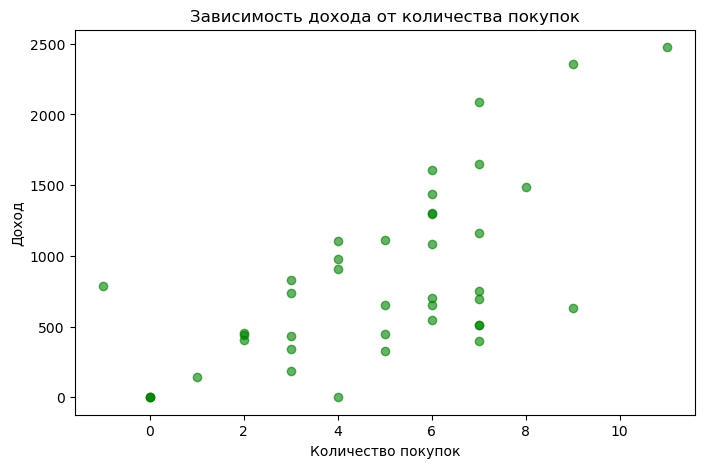

In [35]:
plt.scatter(df["purchases"], df["revenue"], c='green', alpha=0.6)
plt.xlabel("Количество покупок")
plt.ylabel("Доход")
plt.title("Зависимость дохода от количества покупок")
plt.show()

# Комментарий:
# Scatter plot показывает, как доход зависит от количества покупок.

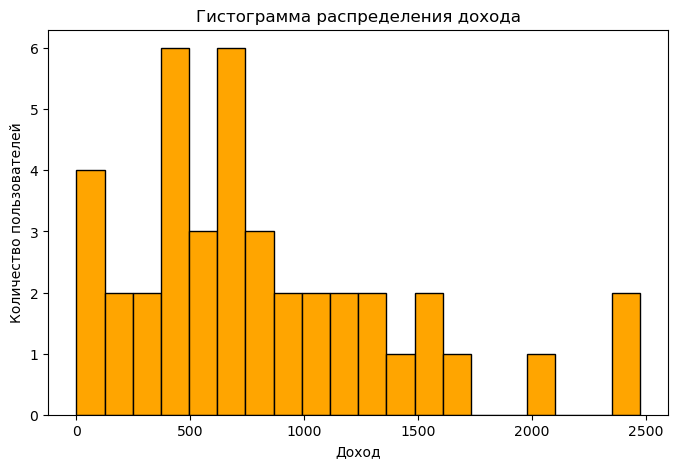

In [36]:
plt.hist(df["revenue"], bins=20, color='orange', edgecolor='black')
plt.xlabel("Доход")
plt.ylabel("Количество пользователей")
plt.title("Гистограмма распределения дохода")
plt.savefig(r"C:/Users/User/Desktop/ИИИ ДПО/Myalina_Olya_AI/homeworks/HW02/figures/revenue_hist.png",
            dpi=200, bbox_inches='tight')
plt.show()
plt.close()